# Air Quality Classification with Deep Learning

#### Project Overview
This Jupyter Notebook project aims to build a classifier using deep learning to categorize air quality based on historical data. The goal is to classify air quality into one of six categories: 'Very Poor,' 'Poor,' 'Moderate,' 'Satisfactory,' 'Severe,' and 'Good.' This classification is based on various environmental features and air quality indices.

# Datasets
The project uses two datasets for training and testing the deep learning model:

* __air_quality_train.csv:__ This dataset contains the training data, including feature columns and labels for air quality. The training dataset has 7782 entries.

* __air_quality_test.csv:__ This dataset contains the testing data with similar feature columns and labels for air quality. The testing dataset is used to evaluate the model's performance.

# Data Features
The datasets consist of the following features:

* PM2.5 (Particulate Matter 2.5)
* PM10 (Particulate Matter 10)
* NO (Nitric Oxide)
* NO2 (Nitrogen Dioxide)
* NOx (Nitrogen Oxides)
* NH3 (Ammonia)
* CO (Carbon Monoxide)
* SO2 (Sulfur Dioxide)
* O3 (Ozone)
* Benzene
* Toluene
* Xylene
* AQI (Air Quality Index)
* Air_Quality (Label)

# Methodology
__Data Preprocessing:__ The project begins with loading and preprocessing the data. This includes handling missing values, encoding the labels, and splitting the data into training and testing sets.

__Model Architecture:__ A deep learning model is designed using the TensorFlow and Keras libraries. The model architecture includes an input layer, hidden layers, and an output layer. The architecture aims to learn the mapping between the input features and the air quality labels.

__Model Training:__ The model is trained on the training dataset using the specified architecture. The training process involves optimizing the model's parameters to minimize the loss function.

__Model Evaluation:__ After training, the model is evaluated using the testing dataset. Evaluation metrics like accuracy, precision, recall, and F1-score are computed to assess the model's performance.

__Confusion Matrix:__ A confusion matrix is generated to visualize the model's performance in classifying each category of air quality.

In [2]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  InputLayer
from tensorflow.keras.layers import  Dense
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("air_quality_train.csv")
test_data = pd.read_csv("air_quality_test.csv")

In [4]:
#print columns and their respective types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7782 entries, 0 to 7781
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        7782 non-null   float64
 1   PM10         7782 non-null   float64
 2   NO           7782 non-null   float64
 3   NO2          7782 non-null   float64
 4   NOx          7782 non-null   float64
 5   NH3          7782 non-null   float64
 6   CO           7782 non-null   float64
 7   SO2          7782 non-null   float64
 8   O3           7782 non-null   float64
 9   Benzene      7782 non-null   float64
 10  Toluene      7782 non-null   float64
 11  Xylene       7782 non-null   float64
 12  AQI          7782 non-null   float64
 13  Air_Quality  7782 non-null   object 
dtypes: float64(13), object(1)
memory usage: 851.3+ KB


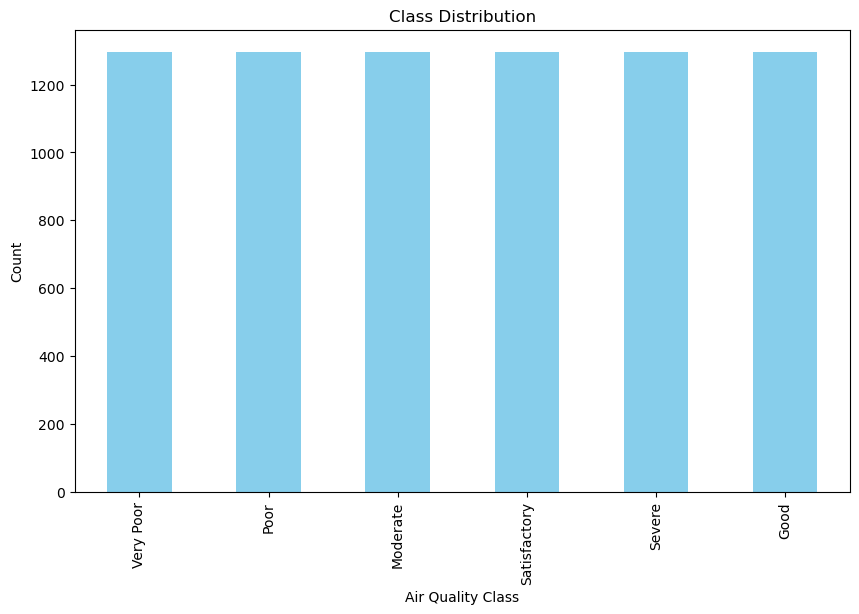

In [5]:
# Class distribution bar plot
plt.figure(figsize=(10, 6))
train_data['Air_Quality'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Air Quality Class')
plt.ylabel('Count')
plt.show()

In [12]:
#print the class distribution
Counter(train_data["Air_Quality"])

Counter({'Very Poor': 1297,
         'Poor': 1297,
         'Moderate': 1297,
         'Satisfactory': 1297,
         'Severe': 1297,
         'Good': 1297})

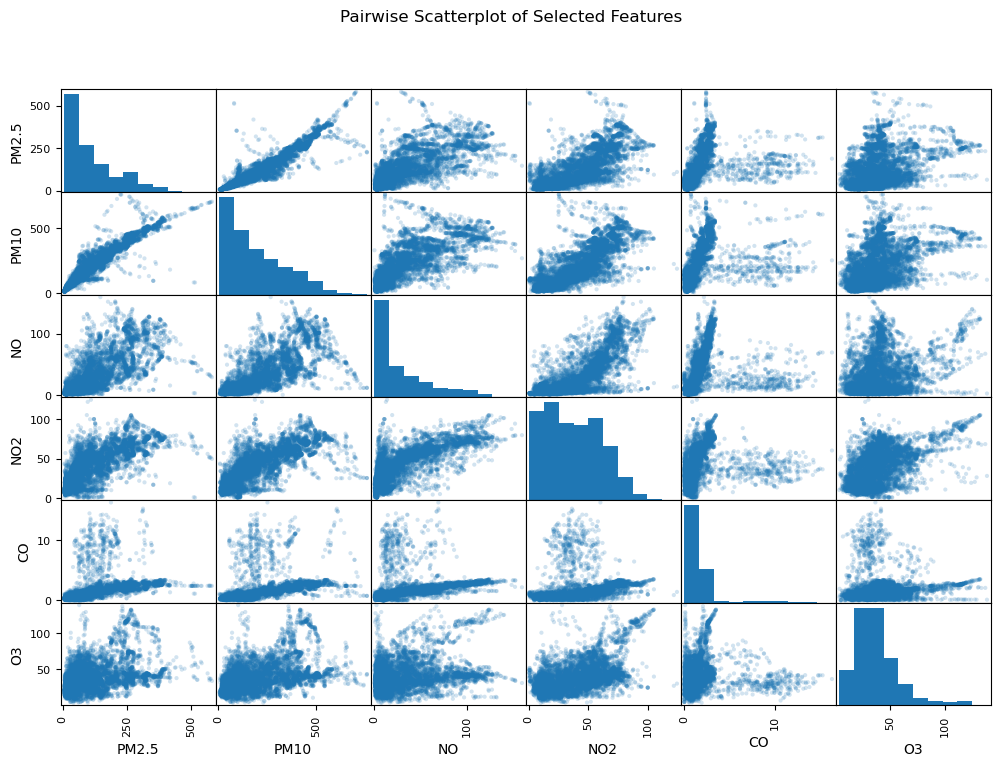

In [7]:
# Pairwise scatterplot for selected features
selected_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'O3']
pd.plotting.scatter_matrix(train_data[selected_features], figsize=(12, 8), alpha=0.2)
plt.suptitle('Pairwise Scatterplot of Selected Features')
plt.show()

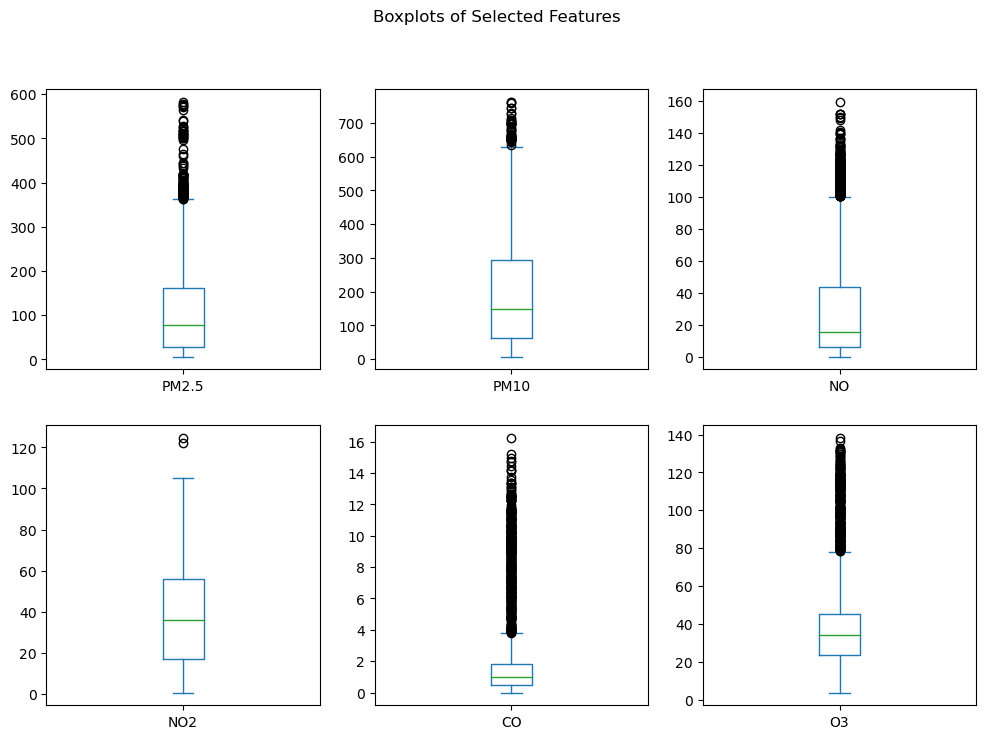

In [12]:
# Boxplot of selected features
selected_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'O3']
train_data[selected_features].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8))
plt.suptitle('Boxplots of Selected Features')
plt.show()

In [13]:
#extract the features from the training data
x_train = train_data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
#extract the label column from the training data
y_train = train_data["Air_Quality"]
#extract the features from the test data
x_test = test_data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
#extract the label column from the test data
y_test = test_data["Air_Quality"]

In [14]:
#encode the labels into integers
le = LabelEncoder()
#convert the integer encoded labels into binary vectors
y_train=le.fit_transform(y_train.astype(str))
y_test=le.transform(y_test.astype(str))

#convert the integer encoded labels into binary vectors
#we comment it here because we need only integer labels for
#sparse cross-entropy
#y_train = tensorflow.keras.utils.to_categorical(y_train, dtype = 'int64')
#y_test = tensorflow.keras.utils.to_categorical(y_test, dtype = 'int64')

In [15]:
#design the model
model = Sequential()
#add the input layer
model.add(InputLayer(input_shape=(x_train.shape[1],)))
#add a hidden layer
model.add(Dense(10, activation='relu'))
#add an output layer
model.add(Dense(6, activation='softmax'))

In [16]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
#train and evaluate the model
model.fit(x_train, y_train, epochs = 40, batch_size = 16, verbose = 0)

In [18]:
#get additional statistics
y_estimate = model.predict(x_test, verbose=0)
y_estimate = np.argmax(y_estimate, axis=1)
print(classification_report(y_test, y_estimate))

              precision    recall  f1-score   support

           0       0.52      0.94      0.67       100
           1       0.96      0.60      0.74       508
           2       0.53      0.65      0.58       172
           3       0.83      0.79      0.81       452
           4       0.23      0.84      0.36        37
           5       0.34      0.32      0.33       125

    accuracy                           0.67      1394
   macro avg       0.57      0.69      0.58      1394
weighted avg       0.76      0.67      0.69      1394



In [19]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.8031 - accuracy: 0.6736


[0.8031071424484253, 0.6736011505126953]

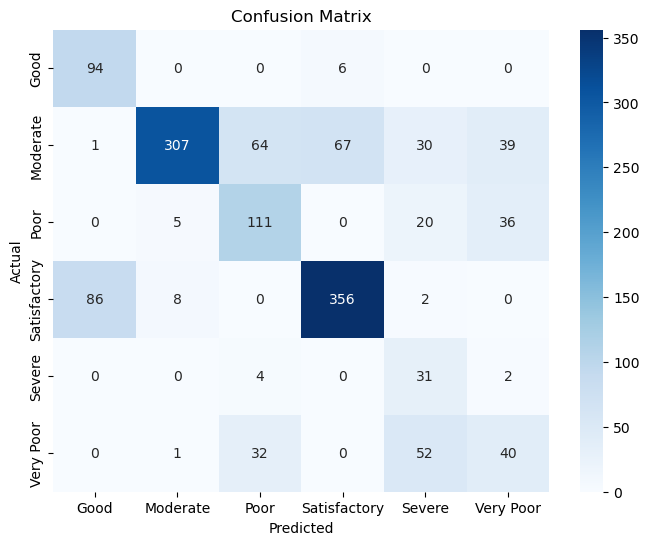

In [20]:
from sklearn.metrics import confusion_matrix

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_estimate)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()